# PyEmittance Tutorial

In [1]:
from pyemittance import PyEmittance
import numpy as np

In [2]:
meas = PyEmittance()

In [3]:
meas.config_name

'LCLS_OTR2'

## Three options for setting configurations for measurements:
1. Make directory under `configs/` with Machine_Device_Name with all needed jsons (see `configs/LCLS2_OTR3`), and pass dir name to `meas.config_name`
2. Change params and configs through class attributes
3. pass the dictionary to pyemittance (same keys and subkeys as `meas.config_dict` below)

In [4]:
meas.num_points = 5

In [5]:
# see all configs with command below
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'opt_pv_info', 'save_scalar_pvs', 'savepaths'])

In [6]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 5,
 'background_im': None,
 'amp_threshold': 1500,
 'min_sigma': 1.0,
 'max_sigma': 60,
 'max_samples': 3,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

In [7]:
meas.quad_init

[-6, -4, -2, 0]

## Example running offline with random beam size numbers

In [8]:
meas.online = False

Running offline.


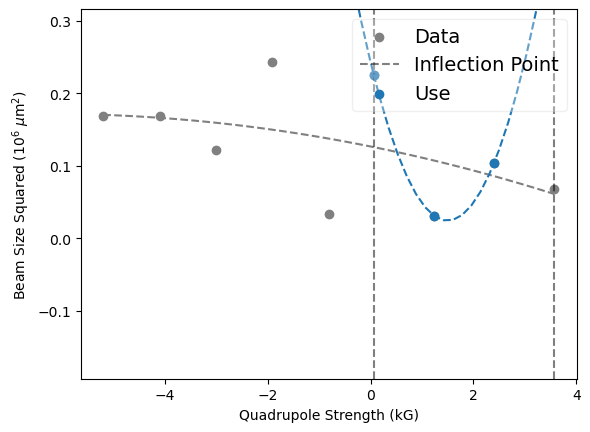

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


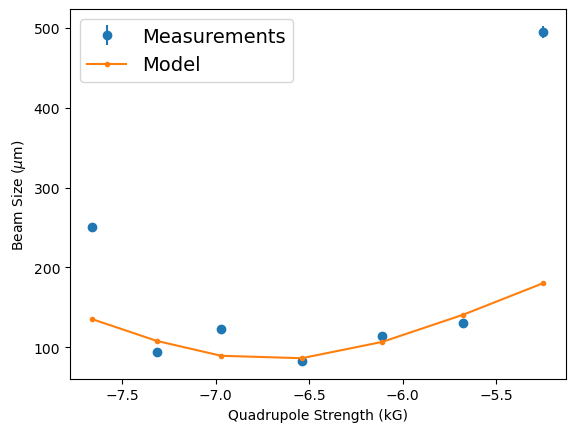

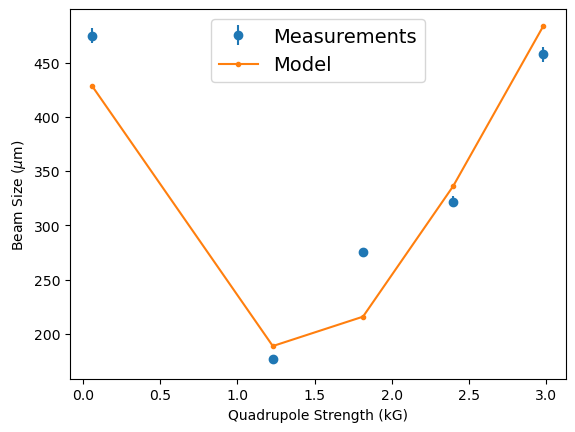

In [9]:
import matplotlib.pyplot as plt
res = meas.measure_emittance()

## Example running online (do not run on machine!)

In [10]:
meas.online = True

In [11]:
try:
    res = meas.measure_emittance()
except:
    pass # epics can't connect on my local pc

Running online!


## Example running with some random beamsize model 
### (can be any simulation, just need to pass pyemittance the beamsize fn)

In [12]:
def get_bs_model(*args):
    return np.random.normal(1e-6, 5e-5), np.random.normal(1e-6, 5e-6), 0, 0

In [13]:
meas.use_model=True
meas.online = False # meaningless when running with a model
meas.get_bs_model = get_bs_model

Running offline.


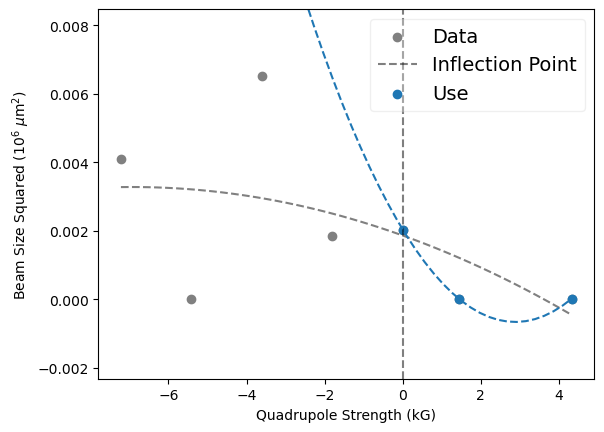

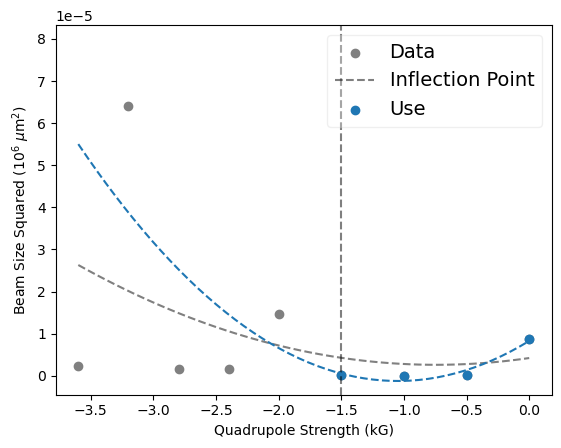

In [14]:
res = meas.measure_emittance()

# Older version emittance evaluation functions

In [15]:
from pyemittance.emit_eval_example import eval_emit_surrogate, eval_emit_machine

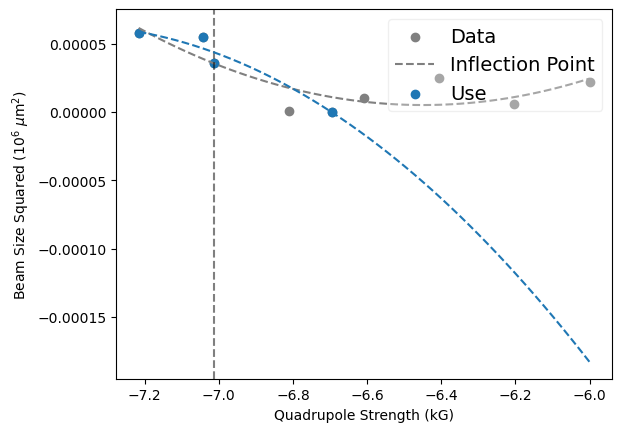

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


In [16]:
eval_emit_surrogate(
    get_bs_model, # need beamsize model for 'surrogate model'
    quad_init=[-6, -4, -2, 0],
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=True,
    show_plots=True,
    add_noise=False,
    use_prev_meas=False,
    quad_tol=0.05,
    save_runs=False,
    calc_bmag=False,
);

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


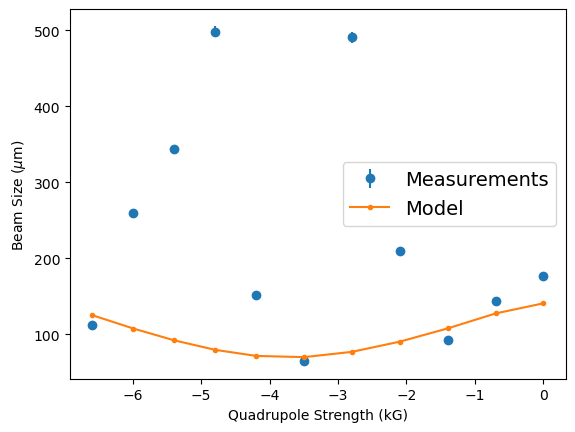

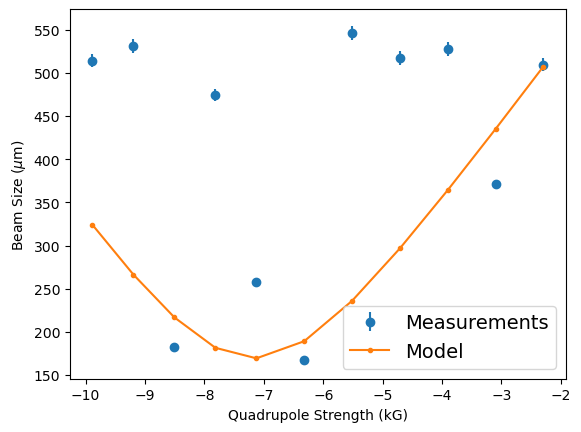

In [17]:
eval_emit_machine(
    quad_init=[-6, -4, -2, 0],
    online=False,
    config_name='FACET_nominal',
    meas_type='OTRS',
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=True,
    show_plots=True,
    use_prev_meas=True,
    quad_tol=0.05,
    save_runs=False,
    calc_bmag=True,
);